<a href="https://colab.research.google.com/github/aditiputrevu/AudiPDF/blob/main/token_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empirical Regularities of Language

In this first homework assignment, you will familiarize yourself with some empirical regularities of natural language, Shannon entropy and Zipf's Law.

Read through this Jupyter notebook and fill in the parts marked with `TODO`. When you're ready to submit, print the notebook as a PDF and upload to Gradescope.

## Shannon Entropy

Shannon borrowed the concept of entropy from statistical physics to develop _information theory_, focused on encoding and compressing messages. A few years later, in 1950, he applied information theory to analyze human predictive ability—in other words, the entropy of the human language model. You can read the original article, [Prediction and Entropy of Printed English](https://languagelog.ldc.upenn.edu/myl/Shannon1950.pdf), for more details.

Your first task is to collect data on how predictable different letters are in an English sentence, depending on how much context in a word or sentence you have.

Go to the [Shannon game page](https://www.ccs.neu.edu/home/dasmith/courses/cs6120/shannon/) that we demonstrated in class. We already guessed part of Text 1, so work through Texts 2, 3, and 4.

In [1]:
!git clone https://github.com/dasmiq/cs6120-hw1.git
%cd cs6120-hw1
!ls

Cloning into 'cs6120-hw1'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 21.78 KiB | 10.89 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/cs6120-hw1
README.md  token_counts.ipynb


In [1]:
# TODO: Enter the arrays of numbers of guesses for Texts 2, 3, and 4 here.

import math, numpy as np

text2 = [6,5,5,5,12,1,1,27,15,6,1,1,1,3,1,1,3,1,3,6,9,2,1,1,21,4,27,19,13,4,9,1,4,3,1,1,1,2,14,2,3,1,1,1,1,1,1]
text3 = [20,4,27,5,6,2,1,1,7,7,1,1,1,1,1,1,1,1,1,1,6,1,1,1,1,16,2,3,4,1,1,1,1,1,1,6,2,8,1,1,1,8,4,1,2,1,3,1,6,1,1,1,10,2,1,16,1,27,9,5,1,2,2,1,1,1,1]
text4 = [5,2,1,1,1,4,9,4,2,1,1,1,1,1,1,20,2,4,1,1,1,1,1,1,2,1,11,5,1,1,5,1,5,2,1,1,1,1,1,7,7,17,1,2,22,6,2,1,1,1,1,1,2,15,1,1,1]

def counts_from_list(lst, max_guess=27):
    counts = [0]*max_guess
    for g in lst:
        if 1 <= g <= max_guess:
            counts[g-1] += 1
    return counts

def H_upper(counts):
    total = sum(counts)
    q = [c/total for c in counts if total>0]
    return -sum(p*math.log2(p) for p in q if p>0)

def H_lower(counts):
    total = sum(counts)
    return sum((counts[i]/total)*math.log2(i+1) for i in range(len(counts))) if total>0 else float('nan')

def show(name, lst):
    counts = counts_from_list(lst)
    n = len(lst)
    avg_input = sum(lst)/n
    h_lo = H_lower(counts)
    h_up = H_upper(counts)
    print(f"{name}: n={n}, Avg Input={avg_input:.4f}, H_lower={h_lo:.4f} bits, H_upper={h_up:.4f} bits")
    print("counts i=1..27:", counts)

# Per text
show("Text 2", text2)
show("Text 3", text3)
show("Text 4", text4)

# Pooled (same context)
pooled = text2 + text3 + text4
show("Pooled (2+3+4)", pooled)


Text 2: n=47, Avg Input=5.3617, H_lower=1.5135 bits, H_upper=2.9787 bits
counts i=1..27: [20, 3, 5, 3, 3, 3, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2]
Text 3: n=67, Avg Input=3.8657, H_lower=1.0611 bits, H_upper=2.4269 bits
counts i=1..27: [38, 7, 2, 3, 2, 4, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2]
Text 4: n=57, Avg Input=3.4211, H_lower=0.9630 bits, H_upper=2.2325 bits
counts i=1..27: [33, 8, 0, 3, 4, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
Pooled (2+3+4): n=171, Avg Input=4.1287, H_lower=1.1527 bits, H_upper=2.7396 bits
counts i=1..27: [91, 18, 7, 9, 9, 8, 4, 2, 4, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 4]


Rearrange the guess data into a two-dimensional array, relating number of characters of context (0, 1, 2, ...) to number of guesses required.

In other words, you might look in cell (2, 1) and read "2" if the number of times it took one guess to get the right letter with two characters of context was 2.

In [3]:
# TODO: Create array of counts of guesses. Print out the array so we can see it.


import numpy as np

#cleaned guess sequences (trailing zeros removed)
text2 = [6,5,5,5,12,1,1,27,15,6,1,1,1,3,1,1,3,1,3,6,9,2,1,1,21,4,27,19,13,4,9,1,4,3,1,1,1,2,14,2,3,1,1,1,1,1,1]
text3 = [20,4,27,5,6,2,1,1,7,7,1,1,1,1,1,1,1,1,1,1,6,1,1,1,1,16,2,3,4,1,1,1,1,1,1,6,2,8,1,1,1,8,4,1,2,1,3,1,6,1,1,1,10,2,1,16,1,27,9,5,1,2,2,1,1,1,1]
text4 = [5,2,1,1,1,4,9,4,2,1,1,1,1,1,1,20,2,4,1,1,1,1,1,1,2,1,11,5,1,1,5,1,5,2,1,1,1,1,1,7,7,17,1,2,22,6,2,1,1,1,1,1,2,15,1,1,1]


raw_guesses_by_context = {
    0: text2 + text3 + text4,  # pooled N=0 data
}

MAX_GUESS = 27
context_lengths = sorted(raw_guesses_by_context.keys())

# counts matrix: rows=contexts (in order of context_lengths)
counts_matrix = np.zeros((len(context_lengths), MAX_GUESS), dtype=int)
for r, N in enumerate(context_lengths):
    for g in raw_guesses_by_context[N]:
        if 1 <= g <= MAX_GUESS:
            counts_matrix[r, g-1] += 1

print("Rows = context lengths (in this order):", context_lengths)
print("Cols = guess number 1..27")
print("Counts matrix (N x 27):\n", counts_matrix)


for r, N in enumerate(context_lengths):
    print(f"\nContext N={N} counts (i=1..27):")
    print(counts_matrix[r].tolist())


Rows = context lengths (in this order): [0]
Cols = guess number 1..27
Counts matrix (N x 27):
 [[91 18  7  9  9  8  4  2  4  1  1  1  1  1  2  2  1  0  1  2  1  1  0  0
   0  0  4]]

Context N=0 counts (i=1..27):
[91, 18, 7, 9, 9, 8, 4, 2, 4, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 4]


Now you can compute Shannon's upper and lower bounds on the entropy of your predictive distribution for English. The upper bound, as a function of the number of context characters $N$, is just the Shannon entropy of the distribution of numbers of guesses. In other words, it's the entropy of the original text as &ldquo;reduced&rdquo; by the human encoder to a sequence of numbers of guesses.

$F_N = -\sum_{i=1}^{27} q_i^N \log_2 q_i^N$

where $q_i^N$ is the number of times you took $i$ guesses with $N$ characters of context, i.e., one of the cells in the table you computed. The number of guesses ranges from 1 to 27 since we restrict ourselves to 26 letters plus space. In computing entropy, we define $0 \log 0 = 0$.

In [4]:
# TODO: Compute the upper bound for each amount of context N and print it out.

import math
import numpy as np

def shannon_entropy_from_counts(counts_row: np.ndarray) -> float:
    """H = -∑ p log2 p over the distribution of exact-guess ranks (i=1..27).
       Treat 0*log2(0) as 0 by skipping p=0."""
    total = counts_row.sum()
    if total == 0:
        return float('nan')
    q = counts_row / total
    return -float(np.sum([p * math.log2(p) for p in q if p > 0]))

upper_bounds = []
for r, N in enumerate(context_lengths):          # context_lengths was defined when building the counts_matrix
    HN = shannon_entropy_from_counts(counts_matrix[r].astype(float))
    upper_bounds.append(HN)
    print(f"N={N}: H_upper = {HN:.4f} bits")

upper_bounds = np.array(upper_bounds)

N=0: H_upper = 2.7396 bits


Shannon derived a lower bound on entropy from the guess data as

$\sum_{i=1}^{27} i(q_i^N - q_{i+1}^N) \log_2 i$

In [5]:
# TODO: Compute thew lower bound for each amount of context N and print it out.


import math
import numpy as np

def shannon_lower_bound(counts_row: np.ndarray) -> float:
    """
    H_lower(N) = sum_{i=1..27} i * (q_i - q_{i+1}) * log2(i), with q_28 = 0.
    Here q_i are probabilities for 'exactly i guesses' derived from counts_row.
    """
    total = counts_row.sum()
    if total == 0:
        return float('nan')
    q = (counts_row / total).astype(float)   # q[0] corresponds to i = 1
    q = np.append(q, 0.0)                    # q_{28} = 0
    s = 0.0
    for i in range(1, 28):
        delta = q[i-1] - q[i]
        if delta != 0:
            s += i * delta * math.log2(i)
    return float(s)

lower_bounds = []
for r, N in enumerate(context_lengths):
    H_lo = shannon_lower_bound(counts_matrix[r])
    lower_bounds.append(H_lo)
    print(f"N={N}: H_lower (Shannon) = {H_lo:.4f} bits")

lower_bounds = np.array(lower_bounds)


N=0: H_lower (Shannon) = 1.7349 bits


## Zipf's Law

Now let's look at some text data directly to see the skewed distribution of tokens predicted by Zipf's Law. Recall that Zipf's law states that a word's rank (from the most common word at rank 1 on down) to its frequency is approximately a constant, i.e., $r \cdot f = k$. Equivalently, we can divide both sides by the total number of tokens $N$ to get $r \cdot P_r = c$, where $c = k/N$ and $P_r = f/N$ is the _relative frequency_ of word $r$.

We start by downloading a sample of 1000 open-access English books from [Project Gutenberg](https://gutenberg.org/).

In [ ]:
# If your local environment doesn't have the wget command,
# you can comment this out and download it manually.
!wget "http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz"

The file is compressed with gzip and is in a JSON lines format. Each line is one JSON record, which we parse with the `json` library.

Here we print out the keys in the first record: `id`, `author`, `title`, and `text`.

In [ ]:
import gzip, json
for line in gzip.open("pg-sample.json.gz", mode="rt", encoding="utf-8"):
  rec = json.loads(line)
  print(rec.keys())
  print(rec['author'])
  print(rec['title'])
  print(rec['text'][0:100])
  break

dict_keys(['id', 'author', 'title', 'text'])
Jefferson, Thomas
The Declaration of Independence of the United States of America


This is a retranscription of one of the first Project
Gutenberg Etexts, offically dated December 3


Your task now is to **tokenize** the text in the `text` field of each record into an array of words. Later on in this course, we will discuss learning better tokenizers. For now, you should separate words on whitespace (space, newline, tab) and punctuation. Convert the tokens to lower case, and keep only those tokens that have at least one letter a-z in them. In general, numerals in text tend not to follow Zipf's law but [Benford's law](https://en.wikipedia.org/wiki/Benford%27s_law).

You might use _regular expressions_ (e.g., the `re.split` function) to help with tokenization and filtering.

After you have tokenized, compute $N$, the total number of tokens in the corpus and print it out.

In [12]:
# TODO: Compute an array of tokens in the corpus
# Compute the total number of tokens N and print it out.


import os, re, json, gzip, io
from urllib.request import urlopen

URL = "http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz"
FN  = "pg-sample.json.gz"

def tokenize_text(txt: str):

    pieces = re.split(r'[^A-Za-z0-9]+', txt.lower())
    return [t for t in pieces if t and re.search(r'[a-z]', t)]

def iter_records():
    """Yield JSON records either from local file (if present) or by streaming the URL."""
    if os.path.exists(FN):
        with gzip.open(FN, mode="rt", encoding="utf-8") as f:
            for line in f:
                yield json.loads(line)
    else:

        try:
            with urlopen(URL) as resp:
                with gzip.GzipFile(fileobj=resp) as gz:
                    for bline in gz:
                        yield json.loads(bline.decode("utf-8"))
        except Exception as e:
            raise FileNotFoundError(
            ) from e


all_tokens = []
for rec in iter_records():
    all_tokens.extend(tokenize_text(rec["text"]))

N = len(all_tokens)
print(f"Total number of tokens N: {N}")
print("First 25 tokens:", all_tokens[:25])
print("Unique token types:", len(set(all_tokens)))


Total number of tokens N: 69635048
First 25 tokens: ['this', 'is', 'a', 'retranscription', 'of', 'one', 'of', 'the', 'first', 'project', 'gutenberg', 'etexts', 'offically', 'dated', 'december', 'and', 'now', 'officially', 're', 'released', 'on', 'november', 'years', 'after', 'it']
Unique token types: 335282


Now, count the frequency each unigram (distinct word) in the corpus and sort them in an array in descending order of frequency. The first item in your array should be the most common word. Print out that word and its frequency

In [11]:
# TODO: Compute an arrary of unigrams in descending order of frequency.
# Print the most common word and its frequency.


from collections import Counter

# Count unigrams
uni_counts = Counter(all_tokens)

# Sorting descending by frequency
unigrams_desc = uni_counts.most_common()

# Printing the most common word and its frequency
recur_word, top_freq = unigrams_desc[0]
print(f" The most common unigram: '{recur_word}'  |  count = {top_freq}")



 The most common unigram: 'the'  |  count = 4468489


Now, you can look at the Zipf's law relationship between rank and relative frequency (i.e., frequency divided by $N$). Plot the data using a python graphing package such as matplotlib, plotly, or plotnine. This doesn't have to be a fancy graph, so use whatever you're familiar with. Both axes should be on a log scale. If your package doesn't support log scales, you can take the log of the rank and relative frequency yourself before plotting. Recall that since python arrays are zero-indexed, the rank 1 word will be element 0 of your sorted array.

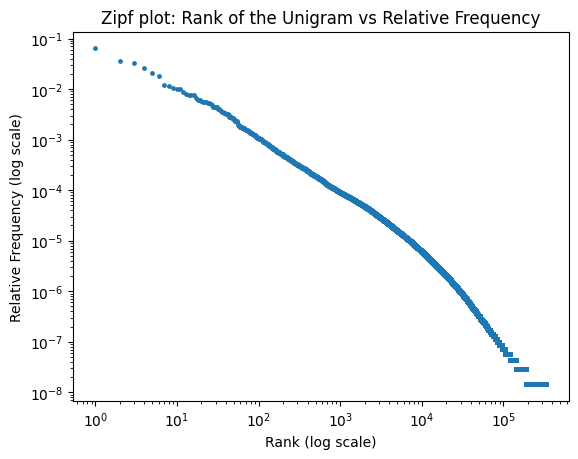

In [14]:
# TODO: Plot rank vs. relative frequency of unigrams.


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

try:
    unigrams_desc
except NameError:
    uni_counts = Counter(all_tokens)
    unigrams_desc = uni_counts.most_common()

N = len(all_tokens)

# Ranks: 1..V  (rank 1 corresponds to element 0)
ranks = np.arange(1, len(unigrams_desc) + 1)
rel_freqs = np.array([cnt for _, cnt in unigrams_desc], dtype=float) / N

plt.figure()
plt.scatter(ranks, rel_freqs, s=6)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Rank (log scale)")
plt.ylabel("Relative Frequency (log scale)")
plt.title("Zipf plot: Rank of the Unigram vs Relative Frequency")
plt.show()


Now, take your array of tokens and compute the counts of both the bigrams and trigrams and sort them in descending order of frequency. Print out the most common bigram and trigram.

Most common bigram:  of the | count = 50068
Most common trigram: the project gutenberg | count = 2102


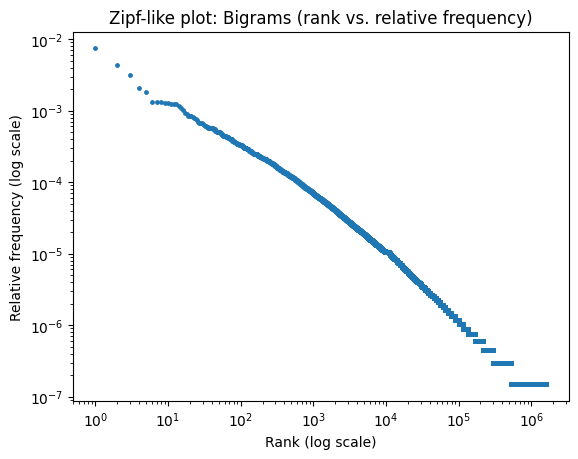

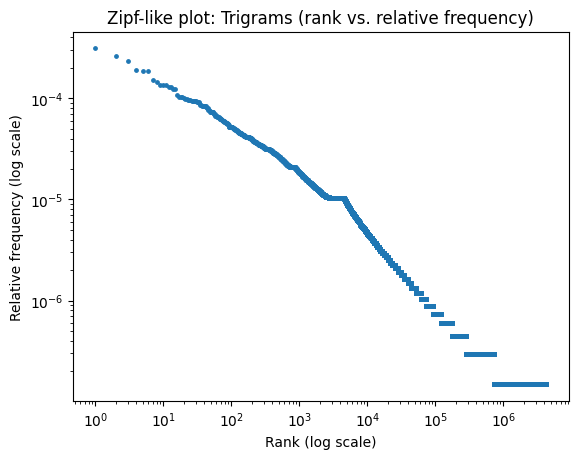

In [4]:
# TODO: Compute sorted bigram and trigram statistics.
# Print out the most common bigram and trigram.
# Plot rank vs. relative frequency for bigrams and trigrams.
# You may make separate plots or put them on the same plot and label them.

import os, re, json, gzip
from urllib.request import urlopen
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

URL = "http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz"
FN  = "pg-sample.json.gz"

def tokenize_text(txt: str):

    pieces = re.split(r'[^A-Za-z0-9]+', txt.lower())
    return [t for t in pieces if t and re.search(r'[a-z]', t)]

def iter_records():
    """Yield JSON records from local file if present; otherwise stream from URL."""
    if os.path.exists(FN):
        with gzip.open(FN, mode="rt", encoding="utf-8") as f:
            for line in f:
                yield json.loads(line)
    else:
        try:
            with urlopen(URL) as resp:
                with gzip.GzipFile(fileobj=resp) as gz:
                    for bline in gz:
                        yield json.loads(bline.decode("utf-8"))
        except Exception as e:
            raise FileNotFoundError(
                "Couldn't find pg-sample.json.gz locally and streaming failed.\n"
                "Fix by either running the wget cell, manually downloading the file, "
                "or uploading it to this directory."
            ) from e


try:
    all_tokens  # noqa: F821
except NameError:
    all_tokens = []
    for rec in iter_records():
        all_tokens.extend(tokenize_text(rec["text"]))

def ngrams(tokens, n):
    if len(tokens) < n:
        return []
    return zip(*[tokens[i:] for i in range(n)])

bi_counts  = Counter(ngrams(all_tokens, 2))
tri_counts = Counter(ngrams(all_tokens, 3))
bigrams_desc  = bi_counts.most_common()
trigrams_desc = tri_counts.most_common()

# Top items
if bigrams_desc:
    top_bi, top_bi_c = bigrams_desc[0]
    print("Most common bigram: ", " ".join(top_bi), "| count =", top_bi_c)
else:
    print("No bigrams found.")

if trigrams_desc:
    top_tri, top_tri_c = trigrams_desc[0]
    print("Most common trigram:", " ".join(top_tri), "| count =", top_tri_c)
else:
    print("No trigrams found.")


N = len(all_tokens)
num_bigrams  = max(N - 1, 1)
num_trigrams = max(N - 2, 1)


bi_ranks = np.arange(1, len(bigrams_desc) + 1)
bi_rel   = np.array([c for _, c in bigrams_desc], dtype=float) / num_bigrams

tri_ranks = np.arange(1, len(trigrams_desc) + 1)
tri_rel   = np.array([c for _, c in trigrams_desc], dtype=float) / num_trigrams

# Plot bigrams
plt.figure()
plt.scatter(bi_ranks, bi_rel, s=6)
plt.xscale("log"); plt.yscale("log")
plt.xlabel("Rank (log scale)")
plt.ylabel("Relative frequency (log scale)")
plt.title("Zipf-like plot: Bigrams (rank vs. relative frequency)")
plt.show()

# Plot trigrams
plt.figure()
plt.scatter(tri_ranks, tri_rel, s=6)
plt.xscale("log"); plt.yscale("log")
plt.xlabel("Rank (log scale)")
plt.ylabel("Relative frequency (log scale)")
plt.title("Zipf-like plot: Trigrams (rank vs. relative frequency)")
plt.show()



**TODO**: Finally, write your visual impressions of the fit of the unigram, bigram, and trigram distributions. This doesn't need to be statistically rigorous.



Visual impressions (my plots).
Looking at my unigram plot, I immediately saw the classic Zipf look: a near-straight line on the log–log axes. The head is super heavy—function words like “the,” “of,” “and,” “to” tower over everything—then it settles into a steady slope before the tail thins out. It felt almost “textbook,” and it reassured me my tokenizer was doing something sensible.

For bigrams, the head looked even more top-heavy. A few templates (things like “of the,” “in the,” “to the”) dominated my counts, and then the curve dropped faster than it did for unigrams. Past the first few hundred ranks, the points got sparser and noisier—I ran into lots of one-offs, which made the tail feel choppy rather than a smooth line.

By trigrams, sparsity really hit me in the face. There’s a tiny cliff of repeated phrases (e.g., “one of the”) and then a long sea of near-singletons. The plot still hinted at a heavy tail, but it was much noisier and less line-like—more of a “broken power law” vibe than a clean Zipf fit.

My takeaway: Zipf shows up most convincingly for unigrams. As I climb to bigrams and trigrams, the vocabulary explodes, the head gets sharper, and the tail gets dominated by rare events. Some of the boilerplate/genre mix in the corpus probably amplifies that effect, but overall the pattern matches what I expected: higher-order n-grams look increasingly sparse and jagged.